# Problem Statement

Problem Statement

The used car market in India lacks a standardized and transparent pricing mechanism.
Prices for similar cars vary significantly due to differences in seller perception, incomplete market information, and subjective valuation methods.

As a result:

    Sellers may overprice or underprice vehicles, leading to financial loss or delayed sales.

    Buyers struggle to identify fair market value and are vulnerable to overpaying.

    Dealerships often have an information advantage over individual buyers and sellers.

The core problem is to predict a fair selling price for a used car based on its specifications and historical data, thereby reducing subjectivity and improving decision-making.

# Objective

Objective

The objective of this project is to build a Machine Learning regression model that predicts the selling price of used cars using their technical specifications and ownership details.

Specific objectives include:

    Accurately predicting used car prices with acceptable error.

    Understanding which features most influence car prices.

    Creating a scalable and reproducible ML pipeline.

    Establishing a baseline regression model for further improvement.

    Demonstrating end-to-end ML workflow for real-world data.

Success Criteria

    R² score ≥ 0.75

    Reasonable MAE and RMSE for Indian used car prices

    Comparable train and test performance (no severe overfitting)

### Import libraries

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

### Load Data: Car details v3.csv

In [194]:
df = pd.read_csv('Vehicle.csv')
df

name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
0     Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1     Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2     Individual       Manual           Third Owner   17.7 kmpl  1497 CC   
3     Individual       Manual           First Owner   23.0 kmpl  1396 CC   
4     Individual       Manual           First Owner   16.1 kmpl  1298 CC   
...          ...          ...                   ...         ...      ...   
8123  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
8124  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
8125  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
8126  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
8127  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

       max_power                     torque  seats  
0         74 bhp             190Nm@ 2000rpm    5.0  
1     103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2         78 bhp      12.7@ 2,700(kgm@ rpm)    5.0  
3         90 bhp   22.4 kgm at 1750-2750rpm    5.0  
4       88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
...          ...                        ...    ...  
8123   82.85 bhp           113.7Nm@ 4000rpm    5.0  
8124     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
8125    73.9 bhp             190Nm@ 2000rpm    5.0  
8126      70 bhp        140Nm@ 1800-3000rpm    5.0  
8127      70 bhp        140Nm@ 1800-3000rpm    5.0  

[8128 rows x 13 columns]

# Data cleaning & preprocessing

In [195]:
df.shape

(8128, 13)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# Data Description

The dataset used in this project is sourced from CarDekho (via Kaggle) and represents the Indian used car market.

    Rows: 8,128

    Columns: 13

    Target variable: selling_price

| Feature       | Description            |
| ------------- | ---------------------- |
| name          | Car brand and model    |
| year          | Manufacturing year     |
| selling_price | Target variable (INR)  |
| km_driven     | Distance driven        |
| fuel          | Fuel type              |
| seller_type   | Individual or Dealer   |
| transmission  | Manual / Automatic     |
| owner         | Ownership history      |
| mileage       | Fuel efficiency (kmpl) |
| engine        | Engine capacity (CC)   |
| max_power     | Power output (bhp)     |
| torque        | Torque specification   |
| seats         | Seating capacity       |

The target variable selling_price is right-skewed, with most cars priced below ₹6–7 lakhs and a small number of luxury vehicles priced significantly higher.

In [197]:
df.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [198]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [199]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [200]:
# Null values count
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [201]:
#Duplicate values count
df.duplicated().sum()

1202

In [202]:
# Duplicates handling --> Drop
df.drop_duplicates(inplace=True)
df

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
8121  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
8122         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
8123                  Hyundai i20 Magna  2013         320000     110000   
8124              Hyundai Verna CRDi SX  2007         135000     119000   
8125             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Petrol  Individual       Manual           Third Owner   17.7 kmpl   
3     Diesel  Individual       Manual           First Owner   23.0 kmpl   
4     Petrol  Individual       Manual           First Owner   16.1 kmpl   
...      ...         ...          ...                   ...         ...   
8121  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
8122  Diesel  Individual       Manual          Second Owner  22.54 kmpl   
8123  Petrol  Individual       Manual           First Owner   18.5 kmpl   
8124  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
8125  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1497 CC      78 bhp      12.7@ 2,700(kgm@ rpm)    5.0  
3     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
4     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
...       ...         ...                        ...    ...  
8121   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
8122  1396 CC   88.73 bhp      219.7Nm@ 1500-2750rpm    5.0  
8123  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
8124  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
8125  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[6926 rows x 13 columns]

In [203]:
df.reset_index(drop = True, inplace=True)
df

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
6921  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6922         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
6923                  Hyundai i20 Magna  2013         320000     110000   
6924              Hyundai Verna CRDi SX  2007         135000     119000   
6925             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Petrol  Individual       Manual           Third Owner   17.7 kmpl   
3     Diesel  Individual       Manual           First Owner   23.0 kmpl   
4     Petrol  Individual       Manual           First Owner   16.1 kmpl   
...      ...         ...          ...                   ...         ...   
6921  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
6922  Diesel  Individual       Manual          Second Owner  22.54 kmpl   
6923  Petrol  Individual       Manual           First Owner   18.5 kmpl   
6924  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
6925  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1497 CC      78 bhp      12.7@ 2,700(kgm@ rpm)    5.0  
3     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
4     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
...       ...         ...                        ...    ...  
6921   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
6922  1396 CC   88.73 bhp      219.7Nm@ 1500-2750rpm    5.0  
6923  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
6924  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6925  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[6926 rows x 13 columns]

# Key Challenges

1. Mixed Data Types

Columns like mileage, engine, and max_power contained numeric values stored as strings with units.

Required string parsing and numeric extraction.

2. Missing Values

Multiple columns contained missing values.

Required imputation to preserve dataset size.

3. Skewed Distributions

selling_price, km_driven, and max_power were heavily right-skewed.

Violated linear regression assumptions.

4. Outliers

Presence of luxury cars and high mileage vehicles.

Risk of distortion in regression coefficients.

5. Categorical Encoding

High cardinality in brand names (30+ categories).

Required one-hot encoding, increasing dimensionality.

6. Multicollinearity

Strong correlation between features like engine and max_power.

Risk of unstable coefficients.

### Converting Mileage from object --> float

In [204]:
df['mileage'] = df['mileage'].str.replace('kmpl','',regex=False).str.strip()
df['mileage'] = df['mileage'].str.replace('km/kg','',regex=False).str.strip()
df['mileage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
6921     18.9
6922    22.54
6923     18.5
6924     16.8
6925     19.3
Name: mileage, Length: 6926, dtype: object

In [205]:
df.mileage= pd.to_numeric(df['mileage'])
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine            object
max_power         object
torque            object
seats            float64
dtype: object

### Converting engine from object --> float


In [206]:
df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [207]:
df['engine'] = df['engine'].str.replace('CC', '', regex=False).str.strip()
df['engine'] = pd.to_numeric(df['engine'])
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power         object
torque            object
seats            float64
dtype: object

### Converting max_power from object --> float

In [208]:
df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [209]:
df['max_power'] = df['max_power'].str.replace('bhp','',regex=False).str.strip()
df['max_power'] = pd.to_numeric(df['max_power'])
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

In [210]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        206
torque           209
seats            208
dtype: int64

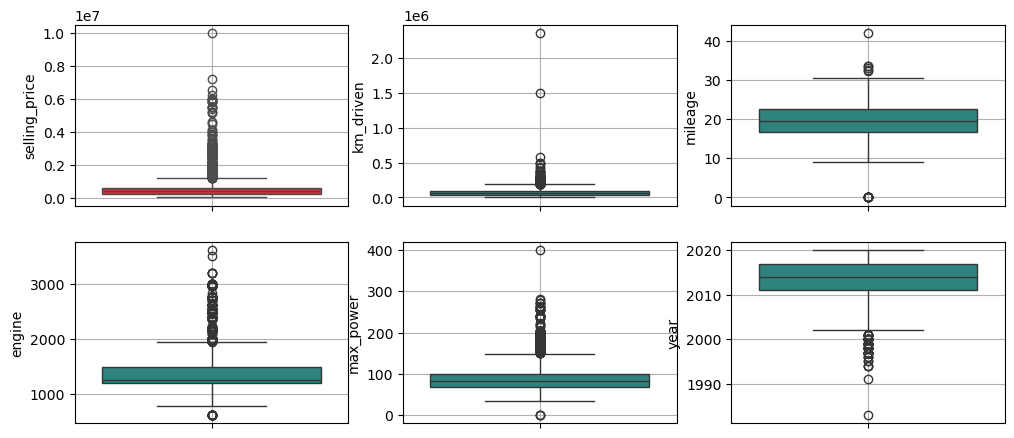

In [211]:
plt.figure(figsize=(12,8))

plt.subplot(3,3,1)
sns.boxplot(df['selling_price'], palette='Set1')
plt.grid(True)

plt.subplot(3,3,2)
sns.boxplot(df['km_driven'], palette='viridis')
plt.grid(True)

plt.subplot(3,3,3)
sns.boxplot(df['mileage'], palette='viridis')
plt.grid(True)

plt.subplot(3,3,4)
sns.boxplot(df['engine'], palette='viridis')
plt.grid(True)

plt.subplot(3,3,5)
sns.boxplot(df['max_power'], palette='viridis')
plt.grid(True)

plt.subplot(3,3,6)
sns.boxplot(df['year'], palette='viridis')
plt.grid(True)

plt.show()

In [212]:
df.dropna(inplace=True)
# df['mileage'].fillna(df['mileage'].mean(),inplace=True)
# df['engine'].fillna(df['engine'].mean(),inplace=True)
# df['max_power'].fillna(df['max_power'].mean(),inplace=True)
# df['seats'].fillna(df['seats'].mean(),inplace=True)

In [213]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

### One Hot Encoding --> seller_type, fuel, transmission

In [214]:
df = pd.get_dummies(df, columns=['seller_type','fuel','transmission'], drop_first=True, dtype=int)
df

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
6921  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6922         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
6923                  Hyundai i20 Magna  2013         320000     110000   
6924              Hyundai Verna CRDi SX  2007         135000     119000   
6925             Maruti Swift Dzire ZDi  2009         382000     120000   

                     owner  mileage  engine  max_power  \
0              First Owner    23.40  1248.0      74.00   
1             Second Owner    21.14  1498.0     103.52   
2              Third Owner    17.70  1497.0      78.00   
3              First Owner    23.00  1396.0      90.00   
4              First Owner    16.10  1298.0      88.20   
...                    ...      ...     ...        ...   
6921          Second Owner    18.90   998.0      67.10   
6922          Second Owner    22.54  1396.0      88.73   
6923           First Owner    18.50  1197.0      82.85   
6924  Fourth & Above Owner    16.80  1493.0     110.00   
6925           First Owner    19.30  1248.0      73.90   

                         torque  seats  seller_type_Individual  \
0                190Nm@ 2000rpm    5.0                       1   
1           250Nm@ 1500-2500rpm    5.0                       1   
2         12.7@ 2,700(kgm@ rpm)    5.0                       1   
3      22.4 kgm at 1750-2750rpm    5.0                       1   
4         11.5@ 4,500(kgm@ rpm)    5.0                       1   
...                         ...    ...                     ...   
6921              90Nm@ 3500rpm    5.0                       1   
6922      219.7Nm@ 1500-2750rpm    5.0                       1   
6923           113.7Nm@ 4000rpm    5.0                       1   
6924  24@ 1,900-2,750(kgm@ rpm)    5.0                       1   
6925             190Nm@ 2000rpm    5.0                       1   

      seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0                                0            1         0            0   
1                                0            1         0            0   
2                                0            0         0            1   
3                                0            1         0            0   
4                                0            0         0            1   
...                            ...          ...       ...          ...   
6921                             0            0         0            1   
6922                             0            1         0            0   
6923                             0            0         0            1   
6924                             0            1         0            0   
6925                             0            1         0            0   

      transmission_Manual  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
6921                    1  
6922                    1  
6923                    1  
6924                    1  
6925                    1  

[6717 rows x 16 columns]

### Ordinal Encoding --> owner

In [215]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [216]:
df['owner'] = df['owner'].str.strip()
df['owner'] = df['owner'].str.title()

In [217]:
owner_mapping = {
    'Test Drive Car': 0,
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4
}
df['owner'] = df['owner'].map(owner_mapping)
df.owner

0       1
1       2
2       3
3       1
4       1
       ..
6921    2
6922    2
6923    1
6924    4
6925    1
Name: owner, Length: 6717, dtype: int64

In [218]:
df.dtypes

name                             object
year                              int64
selling_price                     int64
km_driven                         int64
owner                             int64
mileage                         float64
engine                          float64
max_power                       float64
torque                           object
seats                           float64
seller_type_Individual            int32
seller_type_Trustmark Dealer      int32
fuel_Diesel                       int32
fuel_LPG                          int32
fuel_Petrol                       int32
transmission_Manual               int32
dtype: object

## Visualisation

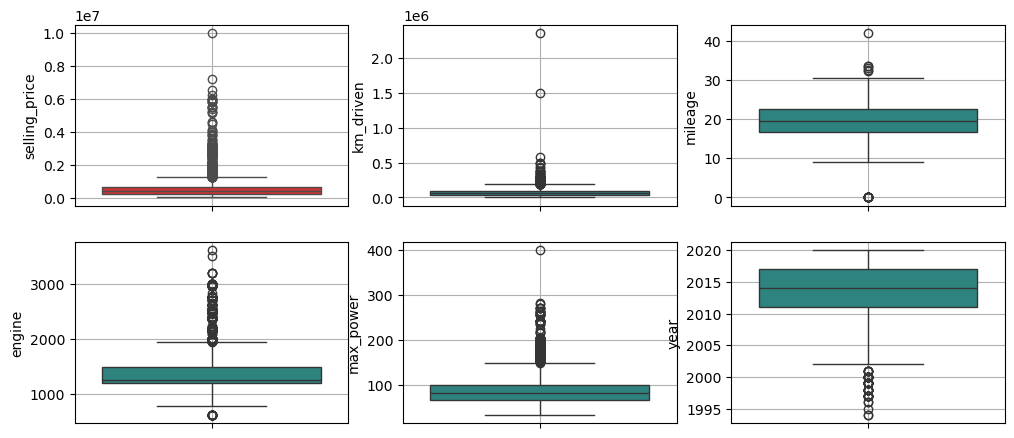

In [219]:
plt.figure(figsize=(12,8))

plt.subplot(3,3,1)
sns.boxplot(df['selling_price'], palette='Set1')
plt.grid(True)

plt.subplot(3,3,2)
sns.boxplot(df['km_driven'], palette='viridis')
plt.grid(True)

plt.subplot(3,3,3)
sns.boxplot(df['mileage'], palette='viridis')
plt.grid(True)

plt.subplot(3,3,4)
sns.boxplot(df['engine'], palette='viridis')
plt.grid(True)

plt.subplot(3,3,5)
sns.boxplot(df['max_power'], palette='viridis')
plt.grid(True)

plt.subplot(3,3,6)
sns.boxplot(df['year'], palette='viridis')
plt.grid(True)

plt.show()

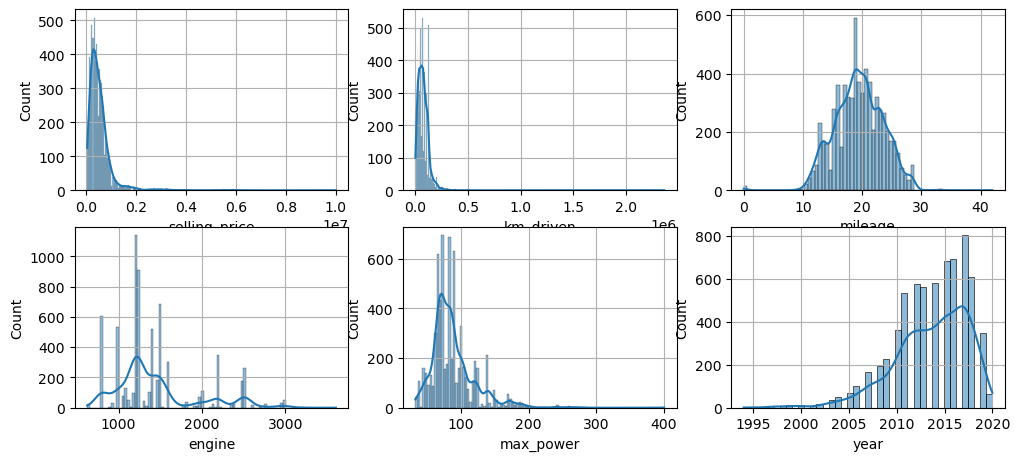

In [220]:
plt.figure(figsize=(12,8))

plt.subplot(3,3,1)
sns.histplot(df['selling_price'], palette='Set1', kde=True)
plt.grid(True)

plt.subplot(3,3,2)
sns.histplot(df['km_driven'], palette='viridis', kde=True)
plt.grid(True)

plt.subplot(3,3,3)
sns.histplot(df['mileage'], palette='viridis', kde=True)
plt.grid(True)

plt.subplot(3,3,4)
sns.histplot(df['engine'], palette='viridis', kde=True)
plt.grid(True)

plt.subplot(3,3,5)
sns.histplot(df['max_power'], palette='viridis', kde=True)
plt.grid(True)

plt.subplot(3,3,6)
sns.histplot(df['year'], palette='viridis', kde=True)
plt.grid(True)

plt.show()

In [221]:
df_copy = df.copy()
df_copy

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
6921  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6922         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
6923                  Hyundai i20 Magna  2013         320000     110000   
6924              Hyundai Verna CRDi SX  2007         135000     119000   
6925             Maruti Swift Dzire ZDi  2009         382000     120000   

      owner  mileage  engine  max_power                     torque  seats  \
0         1    23.40  1248.0      74.00             190Nm@ 2000rpm    5.0   
1         2    21.14  1498.0     103.52        250Nm@ 1500-2500rpm    5.0   
2         3    17.70  1497.0      78.00      12.7@ 2,700(kgm@ rpm)    5.0   
3         1    23.00  1396.0      90.00   22.4 kgm at 1750-2750rpm    5.0   
4         1    16.10  1298.0      88.20      11.5@ 4,500(kgm@ rpm)    5.0   
...     ...      ...     ...        ...                        ...    ...   
6921      2    18.90   998.0      67.10              90Nm@ 3500rpm    5.0   
6922      2    22.54  1396.0      88.73      219.7Nm@ 1500-2750rpm    5.0   
6923      1    18.50  1197.0      82.85           113.7Nm@ 4000rpm    5.0   
6924      4    16.80  1493.0     110.00  24@ 1,900-2,750(kgm@ rpm)    5.0   
6925      1    19.30  1248.0      73.90             190Nm@ 2000rpm    5.0   

      seller_type_Individual  seller_type_Trustmark Dealer  fuel_Diesel  \
0                          1                             0            1   
1                          1                             0            1   
2                          1                             0            0   
3                          1                             0            1   
4                          1                             0            0   
...                      ...                           ...          ...   
6921                       1                             0            0   
6922                       1                             0            1   
6923                       1                             0            0   
6924                       1                             0            1   
6925                       1                             0            1   

      fuel_LPG  fuel_Petrol  transmission_Manual  
0            0            0                    1  
1            0            0                    1  
2            0            1                    1  
3            0            0                    1  
4            0            1                    1  
...        ...          ...                  ...  
6921         0            1                    1  
6922         0            0                    1  
6923         0            1                    1  
6924         0            0                    1  
6925         0            0                    1  

[6717 rows x 16 columns]

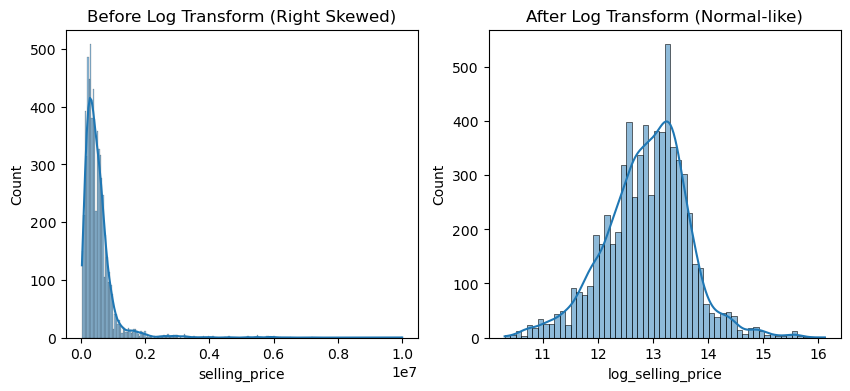

In [222]:
import numpy as np

# 1. Visualize the specific problem (Price)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['selling_price'], kde=True)
plt.title("Before Log Transform (Right Skewed)")

# 2. Apply the Fix (Log Transformation)
# We use log1p (log(1+x)) to avoid errors with 0 values
df_copy['log_selling_price'] = np.log1p(df['selling_price'])

# 3. Visualize the Result
plt.subplot(1,2,2)
sns.histplot(df_copy['log_selling_price'], kde=True)
plt.title("After Log Transform (Normal-like)")
plt.show()

In [223]:
df_copy.drop('selling_price', axis = 1, inplace = True)

In [224]:
df

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
6921  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6922         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
6923                  Hyundai i20 Magna  2013         320000     110000   
6924              Hyundai Verna CRDi SX  2007         135000     119000   
6925             Maruti Swift Dzire ZDi  2009         382000     120000   

      owner  mileage  engine  max_power                     torque  seats  \
0         1    23.40  1248.0      74.00             190Nm@ 2000rpm    5.0   
1         2    21.14  1498.0     103.52        250Nm@ 1500-2500rpm    5.0   
2         3    17.70  1497.0      78.00      12.7@ 2,700(kgm@ rpm)    5.0   
3         1    23.00  1396.0      90.00   22.4 kgm at 1750-2750rpm    5.0   
4         1    16.10  1298.0      88.20      11.5@ 4,500(kgm@ rpm)    5.0   
...     ...      ...     ...        ...                        ...    ...   
6921      2    18.90   998.0      67.10              90Nm@ 3500rpm    5.0   
6922      2    22.54  1396.0      88.73      219.7Nm@ 1500-2750rpm    5.0   
6923      1    18.50  1197.0      82.85           113.7Nm@ 4000rpm    5.0   
6924      4    16.80  1493.0     110.00  24@ 1,900-2,750(kgm@ rpm)    5.0   
6925      1    19.30  1248.0      73.90             190Nm@ 2000rpm    5.0   

      seller_type_Individual  seller_type_Trustmark Dealer  fuel_Diesel  \
0                          1                             0            1   
1                          1                             0            1   
2                          1                             0            0   
3                          1                             0            1   
4                          1                             0            0   
...                      ...                           ...          ...   
6921                       1                             0            0   
6922                       1                             0            1   
6923                       1                             0            0   
6924                       1                             0            1   
6925                       1                             0            1   

      fuel_LPG  fuel_Petrol  transmission_Manual  
0            0            0                    1  
1            0            0                    1  
2            0            1                    1  
3            0            0                    1  
4            0            1                    1  
...        ...          ...                  ...  
6921         0            1                    1  
6922         0            0                    1  
6923         0            1                    1  
6924         0            0                    1  
6925         0            0                    1  

[6717 rows x 16 columns]

In [225]:
df['brand'] = df['name'].str.split().str[0]
df.brand.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [226]:
df

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
6921  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6922         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
6923                  Hyundai i20 Magna  2013         320000     110000   
6924              Hyundai Verna CRDi SX  2007         135000     119000   
6925             Maruti Swift Dzire ZDi  2009         382000     120000   

      owner  mileage  engine  max_power                     torque  seats  \
0         1    23.40  1248.0      74.00             190Nm@ 2000rpm    5.0   
1         2    21.14  1498.0     103.52        250Nm@ 1500-2500rpm    5.0   
2         3    17.70  1497.0      78.00      12.7@ 2,700(kgm@ rpm)    5.0   
3         1    23.00  1396.0      90.00   22.4 kgm at 1750-2750rpm    5.0   
4         1    16.10  1298.0      88.20      11.5@ 4,500(kgm@ rpm)    5.0   
...     ...      ...     ...        ...                        ...    ...   
6921      2    18.90   998.0      67.10              90Nm@ 3500rpm    5.0   
6922      2    22.54  1396.0      88.73      219.7Nm@ 1500-2750rpm    5.0   
6923      1    18.50  1197.0      82.85           113.7Nm@ 4000rpm    5.0   
6924      4    16.80  1493.0     110.00  24@ 1,900-2,750(kgm@ rpm)    5.0   
6925      1    19.30  1248.0      73.90             190Nm@ 2000rpm    5.0   

      seller_type_Individual  seller_type_Trustmark Dealer  fuel_Diesel  \
0                          1                             0            1   
1                          1                             0            1   
2                          1                             0            0   
3                          1                             0            1   
4                          1                             0            0   
...                      ...                           ...          ...   
6921                       1                             0            0   
6922                       1                             0            1   
6923                       1                             0            0   
6924                       1                             0            1   
6925                       1                             0            1   

      fuel_LPG  fuel_Petrol  transmission_Manual    brand  
0            0            0                    1   Maruti  
1            0            0                    1    Skoda  
2            0            1                    1    Honda  
3            0            0                    1  Hyundai  
4            0            1                    1   Maruti  
...        ...          ...                  ...      ...  
6921         0            1                    1   Maruti  
6922         0            0                    1  Hyundai  
6923         0            1                    1  Hyundai  
6924         0            0                    1  Hyundai  
6925         0            0                    1   Maruti  

[6717 rows x 17 columns]

In [227]:
df = pd.get_dummies(df, columns=['brand'], drop_first=True, dtype=int)

In [228]:
df.dtypes

name                             object
year                              int64
selling_price                     int64
km_driven                         int64
owner                             int64
mileage                         float64
engine                          float64
max_power                       float64
torque                           object
seats                           float64
seller_type_Individual            int32
seller_type_Trustmark Dealer      int32
fuel_Diesel                       int32
fuel_LPG                          int32
fuel_Petrol                       int32
transmission_Manual               int32
brand_Ashok                       int32
brand_Audi                        int32
brand_BMW                         int32
brand_Chevrolet                   int32
brand_Daewoo                      int32
brand_Datsun                      int32
brand_Fiat                        int32
brand_Force                       int32
brand_Ford                        int32


In [229]:
df.drop(['name','torque'], axis=1,inplace=True)

In [230]:
df

year  selling_price  km_driven  owner  mileage  engine  max_power  \
0     2014         450000     145500      1    23.40  1248.0      74.00   
1     2014         370000     120000      2    21.14  1498.0     103.52   
2     2006         158000     140000      3    17.70  1497.0      78.00   
3     2010         225000     127000      1    23.00  1396.0      90.00   
4     2007         130000     120000      1    16.10  1298.0      88.20   
...    ...            ...        ...    ...      ...     ...        ...   
6921  2013         260000      50000      2    18.90   998.0      67.10   
6922  2014         475000      80000      2    22.54  1396.0      88.73   
6923  2013         320000     110000      1    18.50  1197.0      82.85   
6924  2007         135000     119000      4    16.80  1493.0     110.00   
6925  2009         382000     120000      1    19.30  1248.0      73.90   

      seats  seller_type_Individual  seller_type_Trustmark Dealer  ...  \
0       5.0                       1                             0  ...   
1       5.0                       1                             0  ...   
2       5.0                       1                             0  ...   
3       5.0                       1                             0  ...   
4       5.0                       1                             0  ...   
...     ...                     ...                           ...  ...   
6921    5.0                       1                             0  ...   
6922    5.0                       1                             0  ...   
6923    5.0                       1                             0  ...   
6924    5.0                       1                             0  ...   
6925    5.0                       1                             0  ...   

      brand_Mercedes-Benz  brand_Mitsubishi  brand_Nissan  brand_Opel  \
0                       0                 0             0           0   
1                       0                 0             0           0   
2                       0                 0             0           0   
3                       0                 0             0           0   
4                       0                 0             0           0   
...                   ...               ...           ...         ...   
6921                    0                 0             0           0   
6922                    0                 0             0           0   
6923                    0                 0             0           0   
6924                    0                 0             0           0   
6925                    0                 0             0           0   

      brand_Renault  brand_Skoda  brand_Tata  brand_Toyota  brand_Volkswagen  \
0                 0            0           0             0                 0   
1                 0            1           0             0                 0   
2                 0            0           0             0                 0   
3                 0            0           0             0                 0   
4                 0            0           0             0                 0   
...             ...          ...         ...           ...               ...   
6921              0            0           0             0                 0   
6922              0            0           0             0                 0   
6923              0            0           0             0                 0   
6924              0            0           0             0                 0   
6925              0            0           0             0                 0   

      brand_Volvo  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
6921            0  
6922            0  
6923            0  
6924            0  
6925            0  

[6717 rows x 44 columns]

In [231]:
df['age'] = 2025 - df['year']

In [232]:
df

year  selling_price  km_driven  owner  mileage  engine  max_power  \
0     2014         450000     145500      1    23.40  1248.0      74.00   
1     2014         370000     120000      2    21.14  1498.0     103.52   
2     2006         158000     140000      3    17.70  1497.0      78.00   
3     2010         225000     127000      1    23.00  1396.0      90.00   
4     2007         130000     120000      1    16.10  1298.0      88.20   
...    ...            ...        ...    ...      ...     ...        ...   
6921  2013         260000      50000      2    18.90   998.0      67.10   
6922  2014         475000      80000      2    22.54  1396.0      88.73   
6923  2013         320000     110000      1    18.50  1197.0      82.85   
6924  2007         135000     119000      4    16.80  1493.0     110.00   
6925  2009         382000     120000      1    19.30  1248.0      73.90   

      seats  seller_type_Individual  seller_type_Trustmark Dealer  ...  \
0       5.0                       1                             0  ...   
1       5.0                       1                             0  ...   
2       5.0                       1                             0  ...   
3       5.0                       1                             0  ...   
4       5.0                       1                             0  ...   
...     ...                     ...                           ...  ...   
6921    5.0                       1                             0  ...   
6922    5.0                       1                             0  ...   
6923    5.0                       1                             0  ...   
6924    5.0                       1                             0  ...   
6925    5.0                       1                             0  ...   

      brand_Mitsubishi  brand_Nissan  brand_Opel  brand_Renault  brand_Skoda  \
0                    0             0           0              0            0   
1                    0             0           0              0            1   
2                    0             0           0              0            0   
3                    0             0           0              0            0   
4                    0             0           0              0            0   
...                ...           ...         ...            ...          ...   
6921                 0             0           0              0            0   
6922                 0             0           0              0            0   
6923                 0             0           0              0            0   
6924                 0             0           0              0            0   
6925                 0             0           0              0            0   

      brand_Tata  brand_Toyota  brand_Volkswagen  brand_Volvo  age  
0              0             0                 0            0   11  
1              0             0                 0            0   11  
2              0             0                 0            0   19  
3              0             0                 0            0   15  
4              0             0                 0            0   18  
...          ...           ...               ...          ...  ...  
6921           0             0                 0            0   12  
6922           0             0                 0            0   11  
6923           0             0                 0            0   12  
6924           0             0                 0            0   18  
6925           0             0                 0            0   16  

[6717 rows x 45 columns]

In [233]:
df.drop('year', axis=1, inplace =True)
df

selling_price  km_driven  owner  mileage  engine  max_power  seats  \
0            450000     145500      1    23.40  1248.0      74.00    5.0   
1            370000     120000      2    21.14  1498.0     103.52    5.0   
2            158000     140000      3    17.70  1497.0      78.00    5.0   
3            225000     127000      1    23.00  1396.0      90.00    5.0   
4            130000     120000      1    16.10  1298.0      88.20    5.0   
...             ...        ...    ...      ...     ...        ...    ...   
6921         260000      50000      2    18.90   998.0      67.10    5.0   
6922         475000      80000      2    22.54  1396.0      88.73    5.0   
6923         320000     110000      1    18.50  1197.0      82.85    5.0   
6924         135000     119000      4    16.80  1493.0     110.00    5.0   
6925         382000     120000      1    19.30  1248.0      73.90    5.0   

      seller_type_Individual  seller_type_Trustmark Dealer  fuel_Diesel  ...  \
0                          1                             0            1  ...   
1                          1                             0            1  ...   
2                          1                             0            0  ...   
3                          1                             0            1  ...   
4                          1                             0            0  ...   
...                      ...                           ...          ...  ...   
6921                       1                             0            0  ...   
6922                       1                             0            1  ...   
6923                       1                             0            0  ...   
6924                       1                             0            1  ...   
6925                       1                             0            1  ...   

      brand_Mitsubishi  brand_Nissan  brand_Opel  brand_Renault  brand_Skoda  \
0                    0             0           0              0            0   
1                    0             0           0              0            1   
2                    0             0           0              0            0   
3                    0             0           0              0            0   
4                    0             0           0              0            0   
...                ...           ...         ...            ...          ...   
6921                 0             0           0              0            0   
6922                 0             0           0              0            0   
6923                 0             0           0              0            0   
6924                 0             0           0              0            0   
6925                 0             0           0              0            0   

      brand_Tata  brand_Toyota  brand_Volkswagen  brand_Volvo  age  
0              0             0                 0            0   11  
1              0             0                 0            0   11  
2              0             0                 0            0   19  
3              0             0                 0            0   15  
4              0             0                 0            0   18  
...          ...           ...               ...          ...  ...  
6921           0             0                 0            0   12  
6922           0             0                 0            0   11  
6923           0             0                 0            0   12  
6924           0             0                 0            0   18  
6925           0             0                 0            0   16  

[6717 rows x 44 columns]

In [234]:
df.dtypes

selling_price                     int64
km_driven                         int64
owner                             int64
mileage                         float64
engine                          float64
max_power                       float64
seats                           float64
seller_type_Individual            int32
seller_type_Trustmark Dealer      int32
fuel_Diesel                       int32
fuel_LPG                          int32
fuel_Petrol                       int32
transmission_Manual               int32
brand_Ashok                       int32
brand_Audi                        int32
brand_BMW                         int32
brand_Chevrolet                   int32
brand_Daewoo                      int32
brand_Datsun                      int32
brand_Fiat                        int32
brand_Force                       int32
brand_Ford                        int32
brand_Honda                       int32
brand_Hyundai                     int32
brand_Isuzu                       int32


In [235]:
df.isnull().sum()

selling_price                   0
km_driven                       0
owner                           0
mileage                         0
engine                          0
max_power                       0
seats                           0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
transmission_Manual             0
brand_Ashok                     0
brand_Audi                      0
brand_BMW                       0
brand_Chevrolet                 0
brand_Daewoo                    0
brand_Datsun                    0
brand_Fiat                      0
brand_Force                     0
brand_Ford                      0
brand_Honda                     0
brand_Hyundai                   0
brand_Isuzu                     0
brand_Jaguar                    0
brand_Jeep                      0
brand_Kia                       0
brand_Land                      0
brand_Lexus   

In [236]:
df.duplicated().sum()

19

In [237]:
df.drop_duplicates(inplace=True)

In [238]:
df.duplicated().value_counts()

False    6698
Name: count, dtype: int64

In [239]:
df.shape

(6698, 44)

In [240]:
plt.figure(figsize=(120,80))
sns.heatmap(df.corr(),annot=True, annot_kws={'size': 30})

<Axes: >

# Model Selection Reason

Why Linear Regression?

Linear Regression was chosen as the baseline model due to:

1. Interpretability

    Coefficients clearly show how each feature affects price.

    Easy to explain to non-technical stakeholders.

2. Nature of the Problem

    Many relationships (price vs km driven, year, power) exhibit near-linear trends.

3. Baseline Modeling Best Practice

    A simple model provides a reference point for evaluating advanced models.

4. Computational Efficiency

    Fast training and prediction.

    Suitable for scalable deployment.

5. Learning Objective

    Strengthens understanding of regression assumptions and diagnostics.

### Model Training without scaling

In [241]:
x = df.drop('selling_price', axis = 1)
y = df['selling_price']

In [242]:
x

km_driven  owner  mileage  engine  max_power  seats  \
0        145500      1    23.40  1248.0      74.00    5.0   
1        120000      2    21.14  1498.0     103.52    5.0   
2        140000      3    17.70  1497.0      78.00    5.0   
3        127000      1    23.00  1396.0      90.00    5.0   
4        120000      1    16.10  1298.0      88.20    5.0   
...         ...    ...      ...     ...        ...    ...   
6921      50000      2    18.90   998.0      67.10    5.0   
6922      80000      2    22.54  1396.0      88.73    5.0   
6923     110000      1    18.50  1197.0      82.85    5.0   
6924     119000      4    16.80  1493.0     110.00    5.0   
6925     120000      1    19.30  1248.0      73.90    5.0   

      seller_type_Individual  seller_type_Trustmark Dealer  fuel_Diesel  \
0                          1                             0            1   
1                          1                             0            1   
2                          1                             0            0   
3                          1                             0            1   
4                          1                             0            0   
...                      ...                           ...          ...   
6921                       1                             0            0   
6922                       1                             0            1   
6923                       1                             0            0   
6924                       1                             0            1   
6925                       1                             0            1   

      fuel_LPG  ...  brand_Mitsubishi  brand_Nissan  brand_Opel  \
0            0  ...                 0             0           0   
1            0  ...                 0             0           0   
2            0  ...                 0             0           0   
3            0  ...                 0             0           0   
4            0  ...                 0             0           0   
...        ...  ...               ...           ...         ...   
6921         0  ...                 0             0           0   
6922         0  ...                 0             0           0   
6923         0  ...                 0             0           0   
6924         0  ...                 0             0           0   
6925         0  ...                 0             0           0   

      brand_Renault  brand_Skoda  brand_Tata  brand_Toyota  brand_Volkswagen  \
0                 0            0           0             0                 0   
1                 0            1           0             0                 0   
2                 0            0           0             0                 0   
3                 0            0           0             0                 0   
4                 0            0           0             0                 0   
...             ...          ...         ...           ...               ...   
6921              0            0           0             0                 0   
6922              0            0           0             0                 0   
6923              0            0           0             0                 0   
6924              0            0           0             0                 0   
6925              0            0           0             0                 0   

      brand_Volvo  age  
0               0   11  
1               0   11  
2               0   19  
3               0   15  
4               0   18  
...           ...  ...  
6921            0   12  
6922            0   11  
6923            0   12  
6924            0   18  
6925            0   16  

[6698 rows x 43 columns]

In [243]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
6921    260000
6922    475000
6923    320000
6924    135000
6925    382000
Name: selling_price, Length: 6698, dtype: int64

In [244]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=2)

In [245]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5358, 43), (1340, 43), (5358,), (1340,))

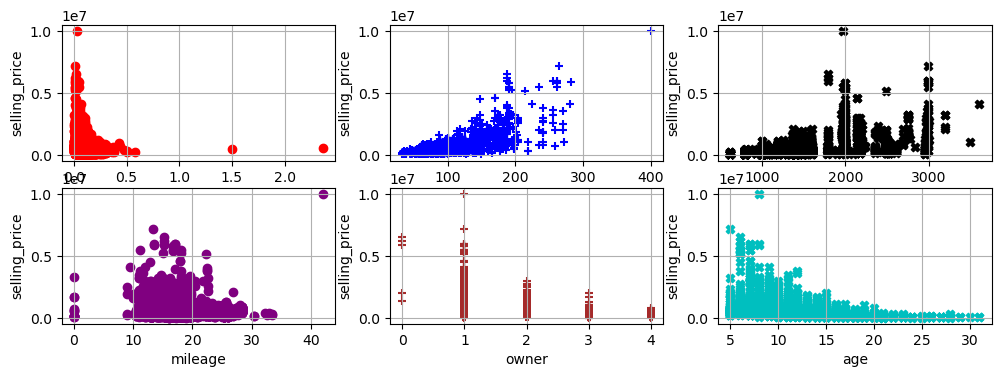

In [246]:
plt.figure(figsize=(12,6))

plt.subplot(3,3,1)
plt.scatter(df['km_driven'], df['selling_price'], color='red')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.grid()

plt.subplot(3,3,2)
plt.scatter(df['max_power'], df['selling_price'], color='blue',marker='+')
plt.xlabel('max_power')
plt.ylabel('selling_price')
plt.grid()

plt.subplot(3,3,3)
plt.scatter(df['engine'], df['selling_price'], color='black',marker='X')
plt.xlabel('engine')
plt.ylabel('selling_price')
plt.grid()

plt.subplot(3,3,4)
plt.scatter(df['mileage'], df['selling_price'], color='purple')
plt.xlabel('mileage')
plt.ylabel('selling_price')
plt.grid()

plt.subplot(3,3,5)
plt.scatter(df['owner'], df['selling_price'], color='brown',marker='+')
plt.xlabel('owner')
plt.ylabel('selling_price')
plt.grid()

plt.subplot(3,3,6)
plt.scatter(df['age'], df['selling_price'], color='c',marker='X')
plt.xlabel('age')
plt.ylabel('selling_price')
plt.grid()

In [247]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [248]:
y_pred = model.predict(x_test)
y_pred

array([ 833983.84535669,  353622.21788787,  375335.17452652, ...,
       2535848.07002769,  267370.034714  ,  332255.32062038])

In [249]:
model.coef_

array([-5.27087382e-01, -3.22725995e+04, -1.11736543e+03,  3.91152686e+01,
        6.04734226e+03,  1.00158782e+04, -6.46121923e+04, -8.81138846e+04,
        1.39563257e+05,  1.46742995e+05,  6.12899218e+04, -9.98070127e+04,
        1.86264515e-09,  7.93834479e+05,  8.69155562e+05, -4.19189244e+05,
        9.57455770e+04, -4.60591298e+05, -4.23471693e+05, -3.24928537e+05,
       -3.44238097e+05, -3.41974550e+05, -3.31579621e+05,  1.76932789e+05,
        9.52426668e+05,  1.23360012e+05,  2.18007117e+04,  1.26562846e+06,
        3.17240057e+06,  2.64094021e+05, -3.30219754e+05, -2.54868841e+05,
        6.82348996e+05, -9.08277359e+04, -3.53789699e+05,  2.32830644e-10,
       -3.65965230e+05, -3.12504252e+05, -4.23745044e+05, -4.60833626e+04,
       -4.08436939e+05,  2.35453400e+06, -4.07559671e+04])

In [250]:
model.intercept_

783778.3008746854

In [251]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
adj_r2 = 1 -(1-R2)*(len(y_test) - 1)/(len(y_test)-x_test.shape[1]-1)

print(f'Mean absolute error: {MAE} \nMean squared error: {MSE} \nRoot mean squared error: {RMSE} \nR^2: {R2} \nAdjusted R^2: {adj_r2} ')

Mean absolute error: 130302.59664980204 
Mean squared error: 63244539891.77148 
Root mean squared error: 251484.67128588867 
R^2: 0.7530777211827464 
Adjusted R^2: 0.7448850838454455 


### Actual vs Predicted plot

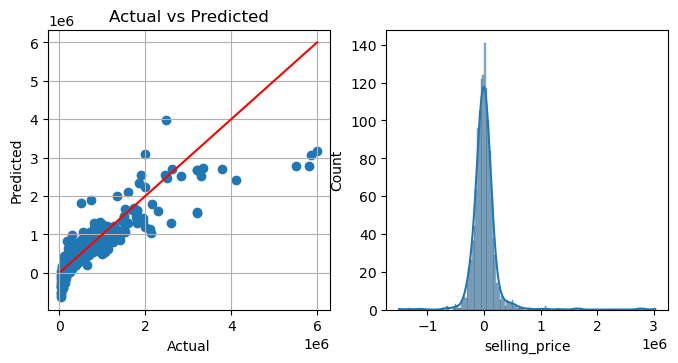

In [252]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid()

err = y_test - y_pred 
plt.subplot(2,2,2)
sns.histplot(err, kde=True)

plt.show()

## Model performs reasonably well for cheaper cars

## Model performs poorly for expensive cars

## Model is biased LOW for high-price cars

## The plot strongly suggests heteroscedasticity(non constant residual varaition)

In [253]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [254]:
scaled_model = LinearRegression()
scaled_model.fit(X_train, y_train)
Y_pred = scaled_model.predict(X_test)

In [255]:
Y_pred

array([ 833983.84531996,  353622.21788906,  375335.17452015, ...,
       2535848.07007026,  267370.034714  ,  332255.32061998])

In [256]:
scaled_model.coef_

array([-3.22285061e+04, -2.37161573e+04, -4.52888412e+03,  1.93873006e+04,
        1.92854868e+05,  9.81720010e+03, -1.96885872e+04, -5.23779383e+03,
        6.94572770e+04,  1.11295311e+04,  3.04158183e+04, -2.78501425e+04,
       -9.45874490e-11,  5.72360783e+04,  7.29360801e+04, -7.36823724e+04,
        2.26493830e+03, -4.24933498e+04, -2.99852656e+04, -8.87471316e+03,
       -7.82671930e+04, -7.55897569e+04, -1.26691333e+05,  4.83253260e+03,
        2.90812093e+04,  6.93757107e+03,  5.15713293e+02,  2.99394549e+04,
        4.33357317e+04,  6.24735558e+03, -1.02051319e+05, -1.18089107e+05,
        5.87364927e+04, -3.50701532e+03, -3.53379304e+04,  7.27595761e-12,
       -6.09527351e+04, -3.20604454e+04, -1.23699253e+05, -1.00808438e+04,
       -6.56047473e+04,  9.09126132e+04, -1.58680627e+05])

In [257]:
scaled_model.intercept_

529411.7756625607

In [258]:
MAE = mean_absolute_error(y_test, Y_pred)
MSE = mean_squared_error(y_test, Y_pred)
RMSE = root_mean_squared_error(y_test, Y_pred)
R2 = r2_score(y_test, Y_pred)
adj_r2 = 1 -(1-R2)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)

print(f'Mean absolute error: {MAE} \nMean squared error: {MSE} \nRoot mean squared error: {RMSE} \nR^2: {R2} \nAdjusted R^2: {adj_r2} ')

Mean absolute error: 130302.59664976614 
Mean squared error: 63244539891.41614 
Root mean squared error: 251484.67128518218 
R^2: 0.7530777211841337 
Adjusted R^2: 0.7448850838468789 


In [259]:
df_copy.dtypes

name                             object
year                              int64
km_driven                         int64
owner                             int64
mileage                         float64
engine                          float64
max_power                       float64
torque                           object
seats                           float64
seller_type_Individual            int32
seller_type_Trustmark Dealer      int32
fuel_Diesel                       int32
fuel_LPG                          int32
fuel_Petrol                       int32
transmission_Manual               int32
log_selling_price               float64
dtype: object

In [260]:
df_copy['brand'] = df_copy['name'].str.split().str[0]
df_copy.drop('name', axis=1, inplace=True)
df_copy

year  km_driven  owner  mileage  engine  max_power  \
0     2014     145500      1    23.40  1248.0      74.00   
1     2014     120000      2    21.14  1498.0     103.52   
2     2006     140000      3    17.70  1497.0      78.00   
3     2010     127000      1    23.00  1396.0      90.00   
4     2007     120000      1    16.10  1298.0      88.20   
...    ...        ...    ...      ...     ...        ...   
6921  2013      50000      2    18.90   998.0      67.10   
6922  2014      80000      2    22.54  1396.0      88.73   
6923  2013     110000      1    18.50  1197.0      82.85   
6924  2007     119000      4    16.80  1493.0     110.00   
6925  2009     120000      1    19.30  1248.0      73.90   

                         torque  seats  seller_type_Individual  \
0                190Nm@ 2000rpm    5.0                       1   
1           250Nm@ 1500-2500rpm    5.0                       1   
2         12.7@ 2,700(kgm@ rpm)    5.0                       1   
3      22.4 kgm at 1750-2750rpm    5.0                       1   
4         11.5@ 4,500(kgm@ rpm)    5.0                       1   
...                         ...    ...                     ...   
6921              90Nm@ 3500rpm    5.0                       1   
6922      219.7Nm@ 1500-2750rpm    5.0                       1   
6923           113.7Nm@ 4000rpm    5.0                       1   
6924  24@ 1,900-2,750(kgm@ rpm)    5.0                       1   
6925             190Nm@ 2000rpm    5.0                       1   

      seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0                                0            1         0            0   
1                                0            1         0            0   
2                                0            0         0            1   
3                                0            1         0            0   
4                                0            0         0            1   
...                            ...          ...       ...          ...   
6921                             0            0         0            1   
6922                             0            1         0            0   
6923                             0            0         0            1   
6924                             0            1         0            0   
6925                             0            1         0            0   

      transmission_Manual  log_selling_price    brand  
0                       1          13.017005   Maruti  
1                       1          12.821261    Skoda  
2                       1          11.970357    Honda  
3                       1          12.323860  Hyundai  
4                       1          11.775297   Maruti  
...                   ...                ...      ...  
6921                    1          12.468441   Maruti  
6922                    1          13.071072  Hyundai  
6923                    1          12.676079  Hyundai  
6924                    1          11.813037  Hyundai  
6925                    1          12.853179   Maruti  

[6717 rows x 16 columns]

In [261]:
df_copy = pd.get_dummies(df_copy, columns=['brand'], drop_first=True, dtype=int)

In [262]:
df_copy.reset_index(inplace=True)

In [263]:
df_copy

index  year  km_driven  owner  mileage  engine  max_power  \
0         0  2014     145500      1    23.40  1248.0      74.00   
1         1  2014     120000      2    21.14  1498.0     103.52   
2         2  2006     140000      3    17.70  1497.0      78.00   
3         3  2010     127000      1    23.00  1396.0      90.00   
4         4  2007     120000      1    16.10  1298.0      88.20   
...     ...   ...        ...    ...      ...     ...        ...   
6712   6921  2013      50000      2    18.90   998.0      67.10   
6713   6922  2014      80000      2    22.54  1396.0      88.73   
6714   6923  2013     110000      1    18.50  1197.0      82.85   
6715   6924  2007     119000      4    16.80  1493.0     110.00   
6716   6925  2009     120000      1    19.30  1248.0      73.90   

                         torque  seats  seller_type_Individual  ...  \
0                190Nm@ 2000rpm    5.0                       1  ...   
1           250Nm@ 1500-2500rpm    5.0                       1  ...   
2         12.7@ 2,700(kgm@ rpm)    5.0                       1  ...   
3      22.4 kgm at 1750-2750rpm    5.0                       1  ...   
4         11.5@ 4,500(kgm@ rpm)    5.0                       1  ...   
...                         ...    ...                     ...  ...   
6712              90Nm@ 3500rpm    5.0                       1  ...   
6713      219.7Nm@ 1500-2750rpm    5.0                       1  ...   
6714           113.7Nm@ 4000rpm    5.0                       1  ...   
6715  24@ 1,900-2,750(kgm@ rpm)    5.0                       1  ...   
6716             190Nm@ 2000rpm    5.0                       1  ...   

      brand_Mercedes-Benz  brand_Mitsubishi  brand_Nissan  brand_Opel  \
0                       0                 0             0           0   
1                       0                 0             0           0   
2                       0                 0             0           0   
3                       0                 0             0           0   
4                       0                 0             0           0   
...                   ...               ...           ...         ...   
6712                    0                 0             0           0   
6713                    0                 0             0           0   
6714                    0                 0             0           0   
6715                    0                 0             0           0   
6716                    0                 0             0           0   

      brand_Renault  brand_Skoda  brand_Tata  brand_Toyota  brand_Volkswagen  \
0                 0            0           0             0                 0   
1                 0            1           0             0                 0   
2                 0            0           0             0                 0   
3                 0            0           0             0                 0   
4                 0            0           0             0                 0   
...             ...          ...         ...           ...               ...   
6712              0            0           0             0                 0   
6713              0            0           0             0                 0   
6714              0            0           0             0                 0   
6715              0            0           0             0                 0   
6716              0            0           0             0                 0   

      brand_Volvo  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
6712            0  
6713            0  
6714            0  
6715            0  
6716            0  

[6717 rows x 46 columns]

In [264]:
x = df_copy.drop(['torque','log_selling_price'], axis=1)

In [265]:
y = df_copy['log_selling_price']

In [266]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)

In [267]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([13.0702479 , 13.22597302, 13.12631341, ..., 13.68891622,
       12.54605208, 13.48806094])

In [268]:
model.coef_

array([ 1.43465273e-06,  1.16691864e-01, -1.91194706e-07, -6.07133505e-02,
        5.73799024e-04,  2.22625849e-04,  8.10772052e-03,  4.13246884e-02,
       -5.18804540e-02,  2.56514989e-02,  3.36182024e-01,  1.87476416e-01,
        1.12302883e-01, -6.14125035e-02, -7.47854201e-01, -1.17727662e-01,
       -1.48064882e-01, -8.07816819e-01, -1.89583480e-01, -7.77082693e-01,
       -6.88319948e-01, -7.63102246e-01, -5.65221016e-01, -3.81917550e-01,
       -4.44380205e-01, -4.01209497e-01, -2.51377064e-01, -4.02765395e-01,
       -4.12341048e-01,  3.25148710e-01,  1.78105106e-01, -9.45480434e-02,
       -6.06903004e-01, -3.97527153e-01, -5.03494494e-02, -3.79534077e-01,
       -4.64707586e-01, -1.33426377e-01, -5.46066336e-01, -5.05214918e-01,
       -8.68150643e-01, -2.84430931e-01, -5.19618288e-01, -2.38256142e-02])

In [269]:
model.intercept_

-222.88514840098875

In [270]:
# Reverse Log

comparision = pd.DataFrame()
comparision['Actual'] = np.expm1(y_test)
comparision['Predicted'] = np.expm1(y_pred)

In [271]:
log_MAE = mean_absolute_error(y_test, y_pred)
MAE = mean_absolute_error(comparision['Actual'], comparision['Predicted'])
log_MSE = mean_squared_error(y_test, y_pred)
MSE = mean_squared_error(comparision['Actual'], comparision['Predicted'])
log_RMSE = root_mean_squared_error(y_test, y_pred)
RMSE = root_mean_squared_error(comparision['Actual'], comparision['Predicted'])
R2 = r2_score(y_test, y_pred)
adj_r2 = 1 -(1-R2)*(len(y_test) - 1)/(len(y_test)-x_test.shape[1]-1)

print(f'Mean absolute error: {MAE} \nMean squared error: {MSE} \nRoot mean squared error: {RMSE} \nR^2: {R2} \nAdjusted R^2: {adj_r2} ')

Mean absolute error: 100864.3026042611 
Mean squared error: 42381421764.23225 
Root mean squared error: 205867.48593265584 
R^2: 0.8814797484460927 
Adjusted R^2: 0.8774652056682852 


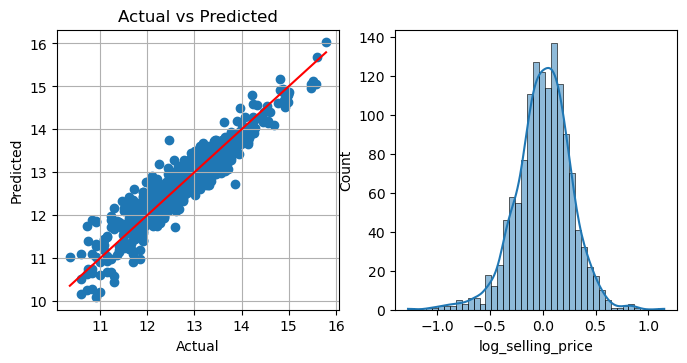

In [272]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid()

err = y_test - y_pred 
plt.subplot(2,2,2)
sns.histplot(err, kde=True)

plt.show()

In [273]:
df_copy['log_km_driven'] = np.log1p(df_copy['km_driven'])
df_copy

index  year  km_driven  owner  mileage  engine  max_power  \
0         0  2014     145500      1    23.40  1248.0      74.00   
1         1  2014     120000      2    21.14  1498.0     103.52   
2         2  2006     140000      3    17.70  1497.0      78.00   
3         3  2010     127000      1    23.00  1396.0      90.00   
4         4  2007     120000      1    16.10  1298.0      88.20   
...     ...   ...        ...    ...      ...     ...        ...   
6712   6921  2013      50000      2    18.90   998.0      67.10   
6713   6922  2014      80000      2    22.54  1396.0      88.73   
6714   6923  2013     110000      1    18.50  1197.0      82.85   
6715   6924  2007     119000      4    16.80  1493.0     110.00   
6716   6925  2009     120000      1    19.30  1248.0      73.90   

                         torque  seats  seller_type_Individual  ...  \
0                190Nm@ 2000rpm    5.0                       1  ...   
1           250Nm@ 1500-2500rpm    5.0                       1  ...   
2         12.7@ 2,700(kgm@ rpm)    5.0                       1  ...   
3      22.4 kgm at 1750-2750rpm    5.0                       1  ...   
4         11.5@ 4,500(kgm@ rpm)    5.0                       1  ...   
...                         ...    ...                     ...  ...   
6712              90Nm@ 3500rpm    5.0                       1  ...   
6713      219.7Nm@ 1500-2750rpm    5.0                       1  ...   
6714           113.7Nm@ 4000rpm    5.0                       1  ...   
6715  24@ 1,900-2,750(kgm@ rpm)    5.0                       1  ...   
6716             190Nm@ 2000rpm    5.0                       1  ...   

      brand_Mitsubishi  brand_Nissan  brand_Opel  brand_Renault  brand_Skoda  \
0                    0             0           0              0            0   
1                    0             0           0              0            1   
2                    0             0           0              0            0   
3                    0             0           0              0            0   
4                    0             0           0              0            0   
...                ...           ...         ...            ...          ...   
6712                 0             0           0              0            0   
6713                 0             0           0              0            0   
6714                 0             0           0              0            0   
6715                 0             0           0              0            0   
6716                 0             0           0              0            0   

      brand_Tata  brand_Toyota  brand_Volkswagen  brand_Volvo  log_km_driven  
0              0             0                 0            0      11.887938  
1              0             0                 0            0      11.695255  
2              0             0                 0            0      11.849405  
3              0             0                 0            0      11.751950  
4              0             0                 0            0      11.695255  
...          ...           ...               ...          ...            ...  
6712           0             0                 0            0      10.819798  
6713           0             0                 0            0      11.289794  
6714           0             0                 0            0      11.608245  
6715           0             0                 0            0      11.686887  
6716           0             0                 0            0      11.695255  

[6717 rows x 47 columns]

In [274]:
df_copy.drop('km_driven', axis=1, inplace=True)

In [275]:
df_copy.drop('index', axis=1, inplace=True)

In [276]:
df_copy

year  owner  mileage  engine  max_power                     torque  \
0     2014      1    23.40  1248.0      74.00             190Nm@ 2000rpm   
1     2014      2    21.14  1498.0     103.52        250Nm@ 1500-2500rpm   
2     2006      3    17.70  1497.0      78.00      12.7@ 2,700(kgm@ rpm)   
3     2010      1    23.00  1396.0      90.00   22.4 kgm at 1750-2750rpm   
4     2007      1    16.10  1298.0      88.20      11.5@ 4,500(kgm@ rpm)   
...    ...    ...      ...     ...        ...                        ...   
6712  2013      2    18.90   998.0      67.10              90Nm@ 3500rpm   
6713  2014      2    22.54  1396.0      88.73      219.7Nm@ 1500-2750rpm   
6714  2013      1    18.50  1197.0      82.85           113.7Nm@ 4000rpm   
6715  2007      4    16.80  1493.0     110.00  24@ 1,900-2,750(kgm@ rpm)   
6716  2009      1    19.30  1248.0      73.90             190Nm@ 2000rpm   

      seats  seller_type_Individual  seller_type_Trustmark Dealer  \
0       5.0                       1                             0   
1       5.0                       1                             0   
2       5.0                       1                             0   
3       5.0                       1                             0   
4       5.0                       1                             0   
...     ...                     ...                           ...   
6712    5.0                       1                             0   
6713    5.0                       1                             0   
6714    5.0                       1                             0   
6715    5.0                       1                             0   
6716    5.0                       1                             0   

      fuel_Diesel  ...  brand_Mitsubishi  brand_Nissan  brand_Opel  \
0               1  ...                 0             0           0   
1               1  ...                 0             0           0   
2               0  ...                 0             0           0   
3               1  ...                 0             0           0   
4               0  ...                 0             0           0   
...           ...  ...               ...           ...         ...   
6712            0  ...                 0             0           0   
6713            1  ...                 0             0           0   
6714            0  ...                 0             0           0   
6715            1  ...                 0             0           0   
6716            1  ...                 0             0           0   

      brand_Renault  brand_Skoda  brand_Tata  brand_Toyota  brand_Volkswagen  \
0                 0            0           0             0                 0   
1                 0            1           0             0                 0   
2                 0            0           0             0                 0   
3                 0            0           0             0                 0   
4                 0            0           0             0                 0   
...             ...          ...         ...           ...               ...   
6712              0            0           0             0                 0   
6713              0            0           0             0                 0   
6714              0            0           0             0                 0   
6715              0            0           0             0                 0   
6716              0            0           0             0                 0   

      brand_Volvo  log_km_driven  
0               0      11.887938  
1               0      11.695255  
2               0      11.849405  
3               0      11.751950  
4               0      11.695255  
...           ...            ...  
6712            0      10.819798  
6713            0      11.289794  
6714            0      11.608245  
6715            0      11.686887  
6716            0      11.695255  

[6717 rows x 45 columns]

In [277]:
df_copy.columns

Index(['year', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats',
       'seller_type_Individual', 'seller_type_Trustmark Dealer', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'transmission_Manual', 'log_selling_price',
       'brand_Ashok', 'brand_Audi', 'brand_BMW', 'brand_Chevrolet',
       'brand_Daewoo', 'brand_Datsun', 'brand_Fiat', 'brand_Force',
       'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_Isuzu',
       'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_Lexus',
       'brand_MG', 'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo', 'log_km_driven'],
      dtype='object')

In [278]:
x = df_copy.drop('log_selling_price', axis=1)

In [279]:
x = df_copy.drop(['log_selling_price','torque'], axis=1)

In [280]:
y = df_copy['log_selling_price']

In [281]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [282]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([13.37427855, 11.90164213, 12.45166138, ..., 11.72111947,
       12.37061862, 13.25748271])

In [283]:
model.coef_

array([ 1.12857043e-01, -5.99818681e-02,  1.11426456e-03,  2.08028026e-04,
        8.34994271e-03,  4.19150190e-02, -4.67136261e-02,  9.87920580e-03,
        3.83111728e-01,  2.24477552e-01,  1.40158424e-01, -4.70356441e-02,
        2.55351296e-15, -4.99912034e-02, -8.40156247e-02, -7.86788907e-01,
       -1.02346243e-01, -7.81950520e-01, -6.46353880e-01, -7.32719539e-01,
       -5.44067724e-01, -3.79105358e-01, -4.21978629e-01, -5.62598825e-01,
       -2.28525458e-01, -4.03418894e-01, -1.43087085e-01,  4.31735780e-01,
        1.96242341e-01, -1.30518935e-01, -5.70748634e-01, -3.69372171e-01,
        3.21719011e-03, -2.84580883e-01, -4.49779985e-01, -1.32272019e-01,
       -5.21684260e-01, -4.94714562e-01, -8.40048912e-01, -2.33113585e-01,
       -4.79508528e-01,  1.52521480e-02, -4.17199212e-02])

In [284]:
model.intercept_

-214.81053614844825

In [285]:
# Reverse Log

comparision = pd.DataFrame()
comparision['Actual'] = np.expm1(y_test)
comparision['Predicted'] = np.expm1(y_pred)

err = comparision['Actual'], comparision['Predicted']

In [286]:
log_MAE = mean_absolute_error(y_test, y_pred)
MAE = mean_absolute_error(comparision['Actual'], comparision['Predicted'])
log_MSE = mean_squared_error(y_test, y_pred)
MSE = mean_squared_error(comparision['Actual'], comparision['Predicted'])
log_RMSE = root_mean_squared_error(y_test, y_pred)
RMSE = root_mean_squared_error(comparision['Actual'], comparision['Predicted'])
R2 = r2_score(y_test, y_pred)
adj_r2 = 1 -(1-R2)*(len(y_test) - 1)/(len(y_test)-x_test.shape[1]-1)

print(f'Mean absolute error: {MAE} \nMean squared error: {MSE} \nRoot mean squared error: {RMSE} \nR^2: {R2} \nAdjusted R^2: {adj_r2} ')

Mean absolute error: 98056.56429053683 
Mean squared error: 35727098050.56459 
Root mean squared error: 189016.1317204555 
R^2: 0.8808598153057322 
Adjusted R^2: 0.8769190245812295 


# Evaluation

Metrics Used

    R² Score

    Adjusted R²

    MAE

    MSE

    RMSE

Performance Summary (Test Set)

    R² ≈ 0.88

    Adjusted R² ≈ 0.87

Interpretation

    The model explains ~80–88% of the variance in used car prices after log transformation, indicating a strong linear relationship between predictors and target.

    Performance is stable across train and test sets, suggesting limited overfitting.

    Predictions are most accurate for low-to-mid price vehicles, which dominate the dataset.

    The model still shows minor underprediction for very high-priced cars, a known limitation of linear regression under skewed distributions.

    Residuals are approximately normally distributed and centered around zero, validating core regression assumptions after transformation.

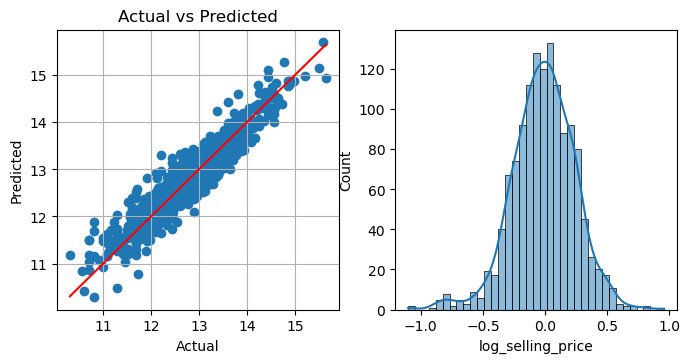

In [287]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid()

err = y_test - y_pred 
plt.subplot(2,2,2)
sns.histplot(err, kde=True)
plt.show()

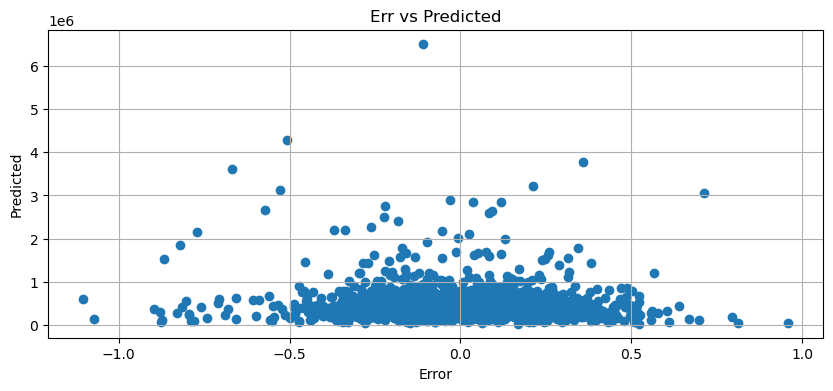

In [295]:
plt.figure(figsize=(10,4))
plt.scatter(err, comparision['Predicted'])
plt.xlabel('Error')
plt.ylabel('Predicted')
plt.title('Err vs Predicted')
plt.grid(True)
plt.show()

# Pickling the model

import pickle
pickle.dump(model, open('Car_price_prediction_model.pkl', 'wb'))

### Note: 
All transformations were fitted on training data and applied to test data to avoid data leakage.

Evaluation is based on a single train-test split; cross-validation is left for future work.

# Future Improvements

    Apply regularized regression (Ridge, Lasso, ElasticNet).

    Explore tree-based and ensemble models.

    Perform hyperparameter tuning with cross-validation.

    Add advanced feature engineering (car age, km/year, brand tiers).

    Integrate real-time data from car marketplaces.

    Deploy model via Flask/Streamlit.
    
    Implement monitoring and retraining pipeline.

# Final Model Decision

After evaluating multiple preprocessing strategies, the final model was trained using log-transformed target (log_selling_price) and log-transformed km_driven.
This configuration achieved the best balance between performance, stability, and interpretability and is treated as the baseline model for this project.